In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#import prettyplotlib as ppl

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Part 1: Make Fake TimeSeries with a "Random Walk"

In [10]:
# Create empty time series list
dts =[]

# Iterate through 120 indicies (timepoints):
for ind in range(120):
    timepoint = np.random.normal(0,1.5)
    dts.append(timepoint)

# Make time series an array
dts = np.array(ts)

# turn the differenced timeseries into a normal timeseries
# what people cal aa 'random walk'
ts = np.cumsum(dts)

# Make x-axis time points
x_times = np.arange(120)

In [3]:
print ts[0:5]
print x_times[0:5]

[ 1.07016121 -0.27714576  0.83383771  1.86656368  1.20603862]
[0 1 2 3 4]


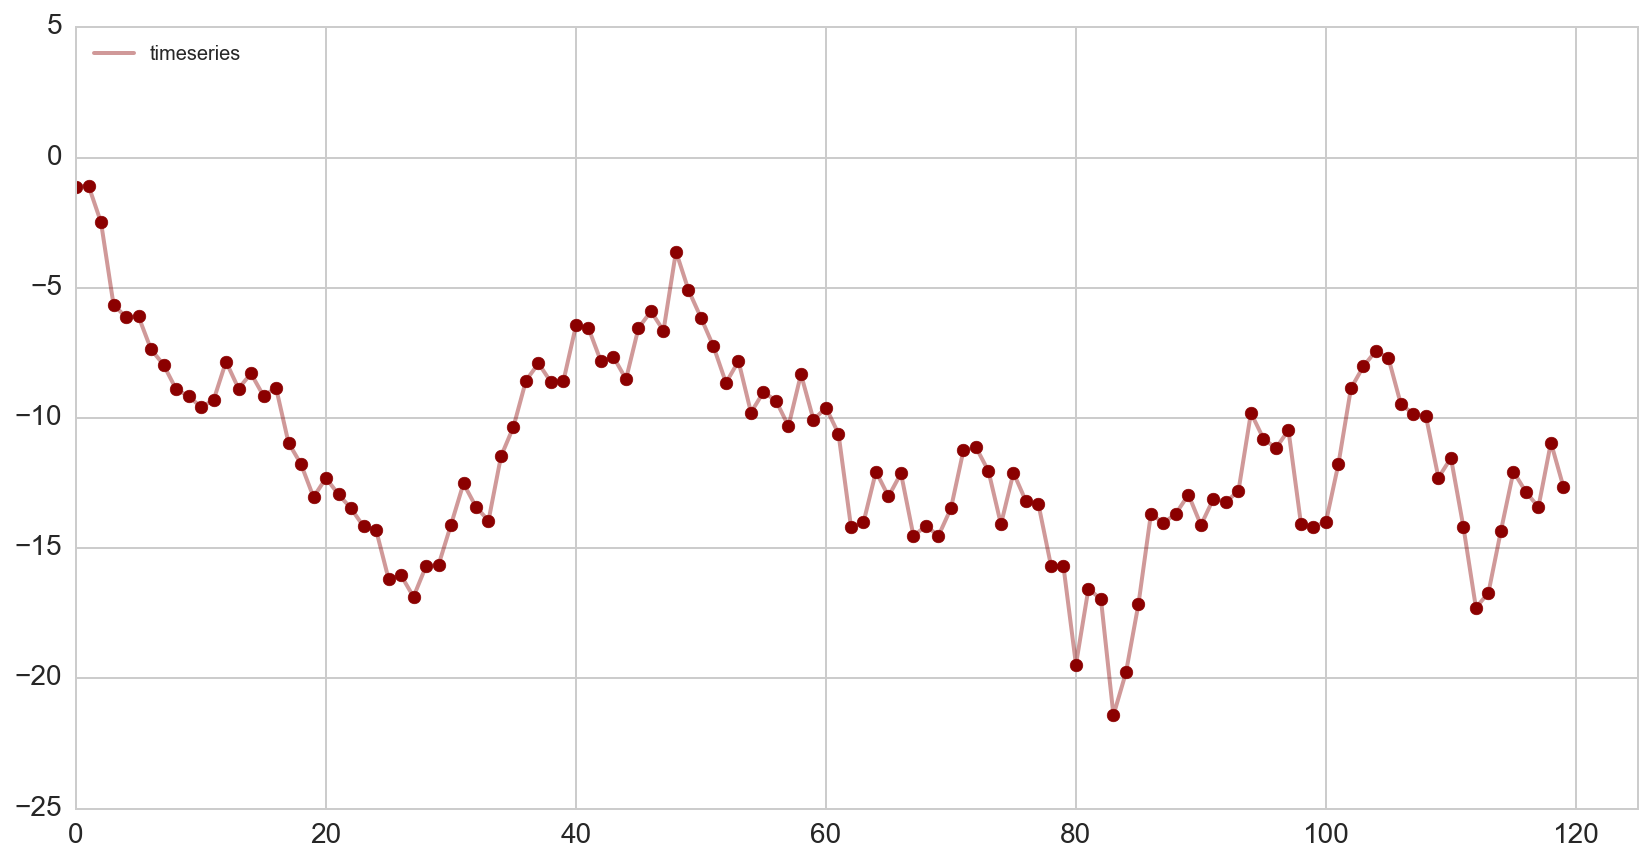

autocorrelation lag-2 [[ 1.          0.81758482]
 [ 0.81758482  1.        ]]


In [19]:
plt.figure(figsize=(14,7))


#plot lag 2
# plt.plot(x_times[:-2], ts[2:], lw=2, color='gray', alpha = 0.5, label='lag-2 timeseries')
# plt.scatter(x_times[:-2], ts[2:], s=40, color ='black')

plt.plot(x_times, ts, lw=2, color='darkred', alpha=0.4, label = 'timeseries')
plt.scatter(x_times, ts, s=40, color = 'darkred')


plt.xlim([0,125])
plt.tick_params(labelsize=14)

# plt.scatter(x_times, ts, s=80, color='black')
plt.legend(loc='upper left')

plt.show()

print 'autocorrelation lag-2', np.corrcoef(ts[:-2], ts[2:])

In [ ]:
plt.figure(figsize=(14,7))


#plot lag 2
# plt.plot(x_times[:-2], ts[2:], lw=2, color='gray', alpha = 0.5, label='lag-2 timeseries')
# plt.scatter(x_times[:-2], ts[2:], s=40, color ='black')

plt.plot(x_times, ts, lw=2, color='darkred', alpha=0.4, label = 'timeseries')
plt.scatter(x_times, ts, s=40, color = 'darkred')


plt.xlim([0,125])
plt.tick_params(labelsize=14)

# plt.scatter(x_times, ts, s=80, color='black')
plt.legend(loc='upper left')

plt.show()

print 'autocorrelation lag-2', np.corrcoef(ts[:-2], ts[2:])

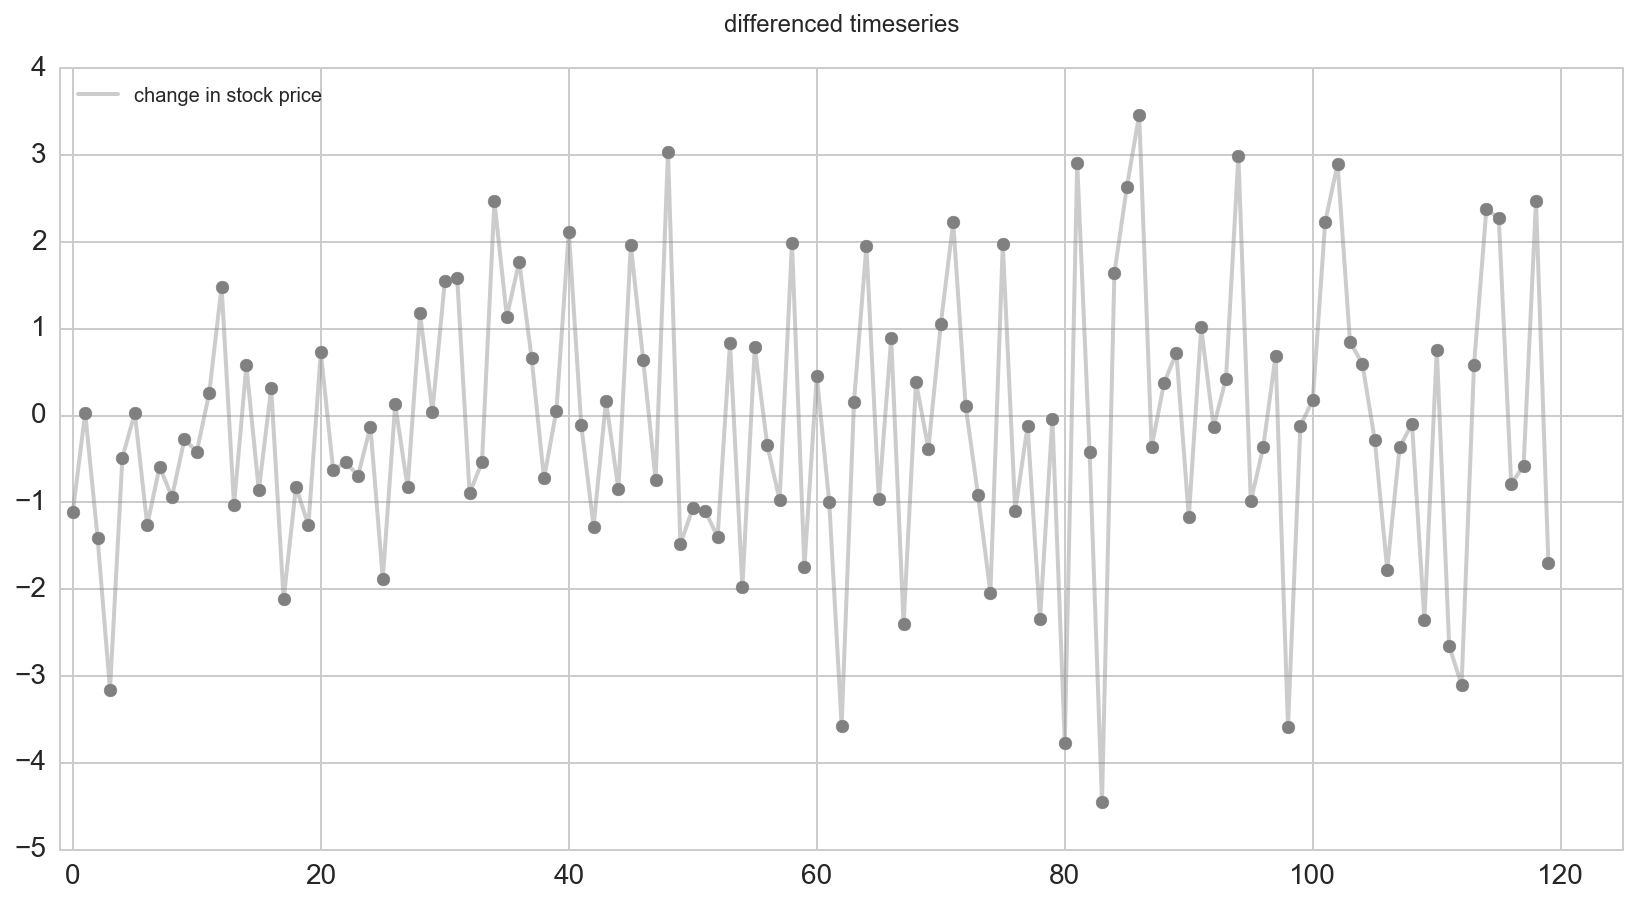

In [20]:
# Plot time series values
plt.figure(figsize=(14,7))
plt.title('differenced timeseries\n')

plt.plot(x_times, dts, lw=2, color = 'gray', alpha = 0.4, label = "change in stock price")
plt.scatter(x_times, dts, s=40, color='grey')

plt.xlim([-1,125])
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')

plt.show()

## Part 2: Make Time Series with "Not so Random Walk"

In [32]:
# create empty timeseries list with initial random point
dts_cor = [np.random.normal(0,1.5)]

# iterate through 119 timepoints
# add relationship to previous
for ind in range(119):
    # pull out previous change
    previous_change=dts_cor[ind-1]
    
    # If previous stock price change went up, likely to go up again
    # If price went down, likely to go down again
    timepoint=np.random.normal(previous_change,1.5)
    dts_cor.append(timepoint)
    
# make 'differenced' time series values an array
dts_cor = np.array(dts_cor)

ts_cor = np.cumsum(dts_cor)

x_times = np.arange(120)

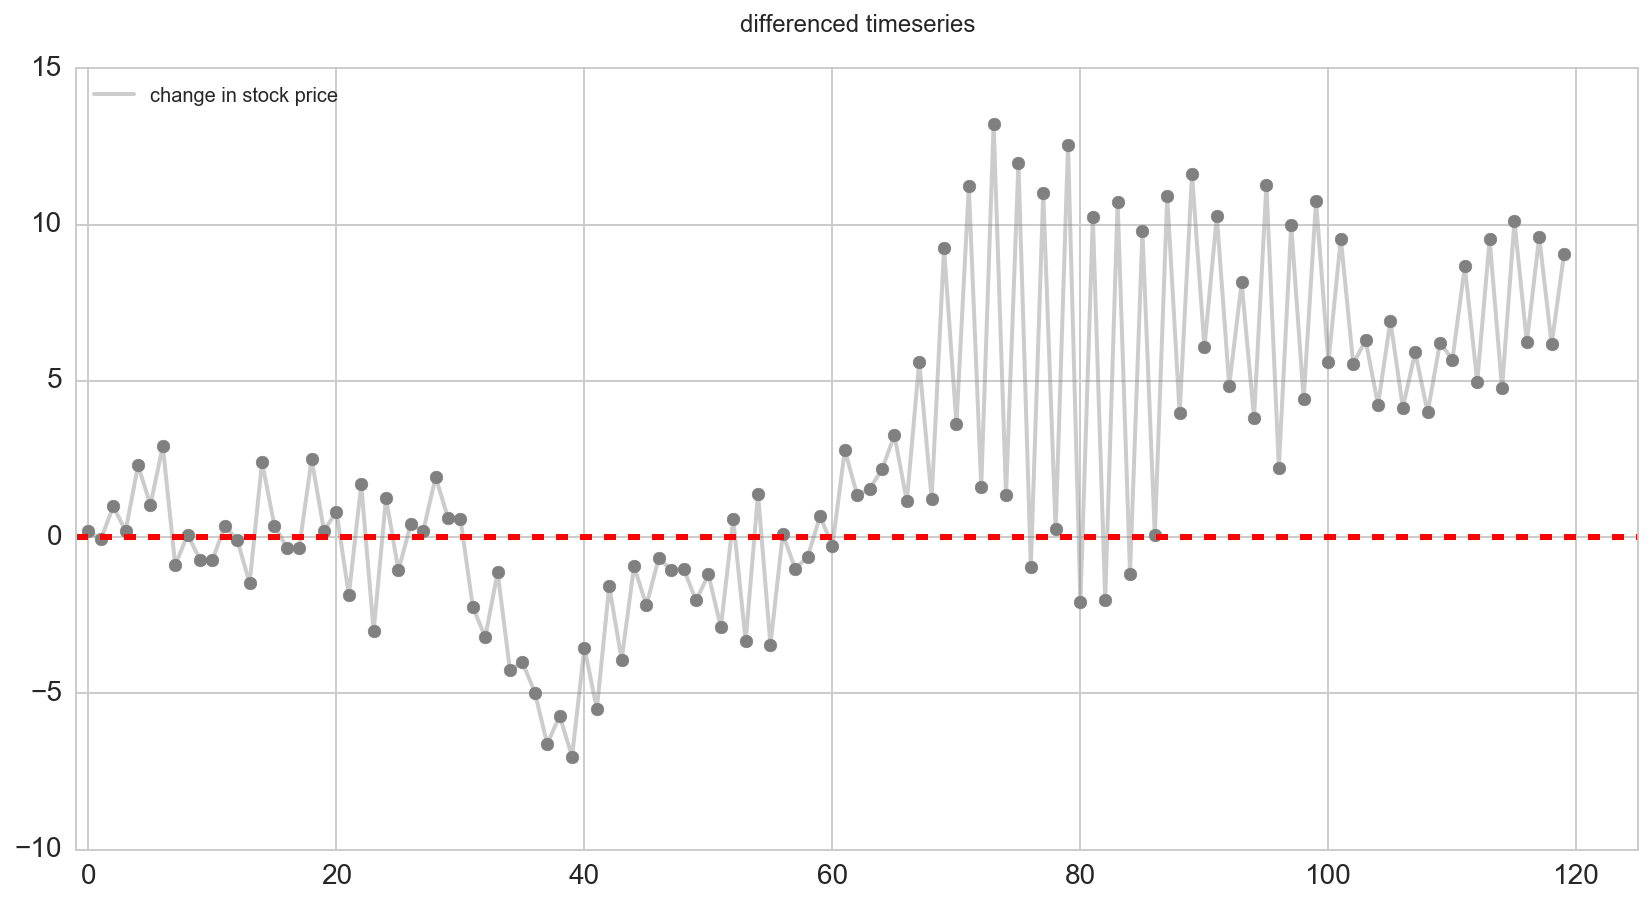

In [33]:
# plot the timeseries values:
plt.figure(figsize=(14,7))
plt.title('differenced timeseries\n')

plt.plot(x_times, dts_cor, lw=2, color='grey', alpha=0.4, label="change in stock price")
plt.scatter(x_times, dts_cor, s=40, color='grey')

# plot horizontal line at zero
plt.axhline(0, lw=3, ls='dashed', color='red')

plt.xlim([-1, 125])
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')

plt.show()

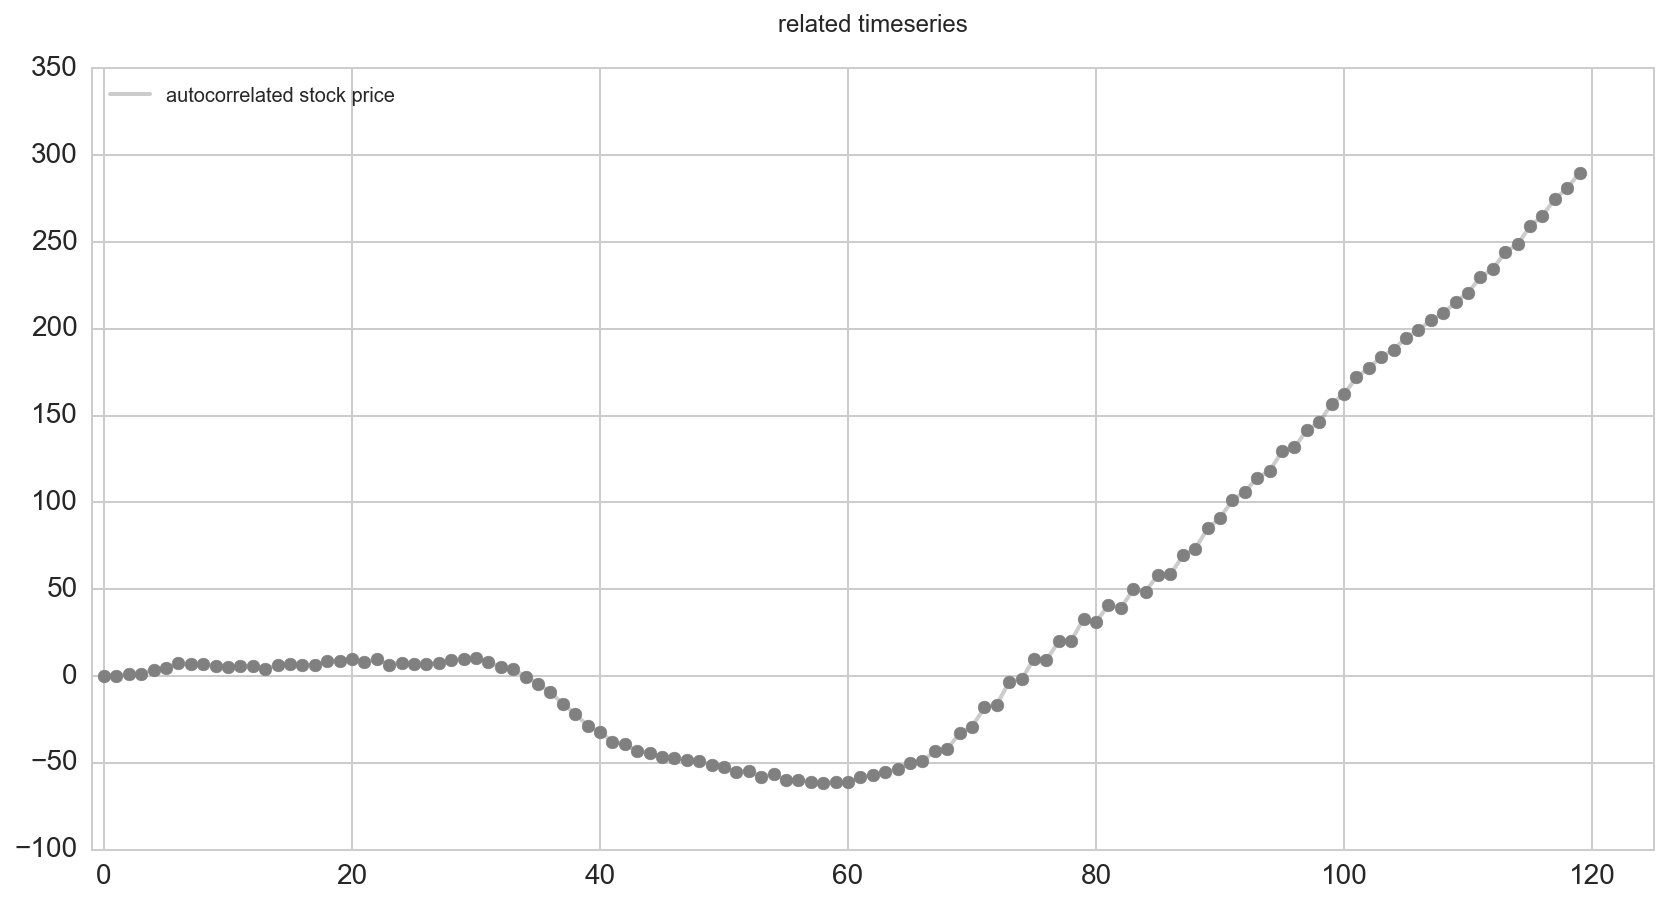

In [34]:
# plot the timeseries values:
plt.figure(figsize=(14,7))
plt.title('related timeseries\n')

plt.plot(x_times, ts_cor, lw=2, color='grey', alpha=0.4, label="autocorrelated stock price")
plt.scatter(x_times, ts_cor, s=40, color='grey')

plt.xlim([-1, 125])
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')

plt.show()

In [35]:
# create empty timeseries list with an initial random point:
dts_cor = [np.random.normal(0, 1.5)]

# iterate through 119 indicies (timepoints).
# add relationship to previous point
for ind in range(119):
    # pull out the previous change:
    previous_change = dts_cor[ind]
    
    # IF previous stock price change went up, likely to go up again.
    # IF previous stock price change went down, likely to go down again.
    
    # Add a bit of randomness to the mean change and standard deviation:
    change_std = np.random.lognormal(0, np.log10((1+abs(previous_change*2))))
    if change_std > 9:
        change_std = 9
    
    change_mean = np.random.normal(previous_change/4., change_std*1.5)
    
    timepoint = np.random.normal(change_mean, 1.5)
        
    dts_cor.append(timepoint)

# make 'differenced' timeseries values an array:
dts_cor = np.array(dts_cor)

# turn the differenced timeseries into a normal timeseries
# this is what people call a 'random walk'
ts_cor = np.cumsum(dts_cor)

# make the x-axis time points:
x_times = np.arange(120)

In [36]:
# create empty timeseries list with an initial random point:
dts_cor = [np.random.normal(0, 1.5)]

# iterate through 119 indicies (timepoints).
# add relationship to previous point
for ind in range(119):
    # pull out the previous change:
    previous_change = dts_cor[ind]
    
    # IF previous stock price change went up, likely to go up again.
    # IF previous stock price change went down, likely to go down again.
    
    # Add a bit of randomness to the mean change and standard deviation:
    change_std = np.random.choice([4,7], size=1, p=[0.9, 0.1])
    
    change_mean = np.random.normal(previous_change/6., change_std*1.5)
    
    timepoint = np.random.normal(change_mean, 1.5)
        
    dts_cor.append(timepoint)

# make 'differenced' timeseries values an array:
dts_cor = np.array(dts_cor)

# turn the differenced timeseries into a normal timeseries
# this is what people call a 'random walk'
ts_cor = np.cumsum(dts_cor)

# make the x-axis time points:
x_times = np.arange(120)

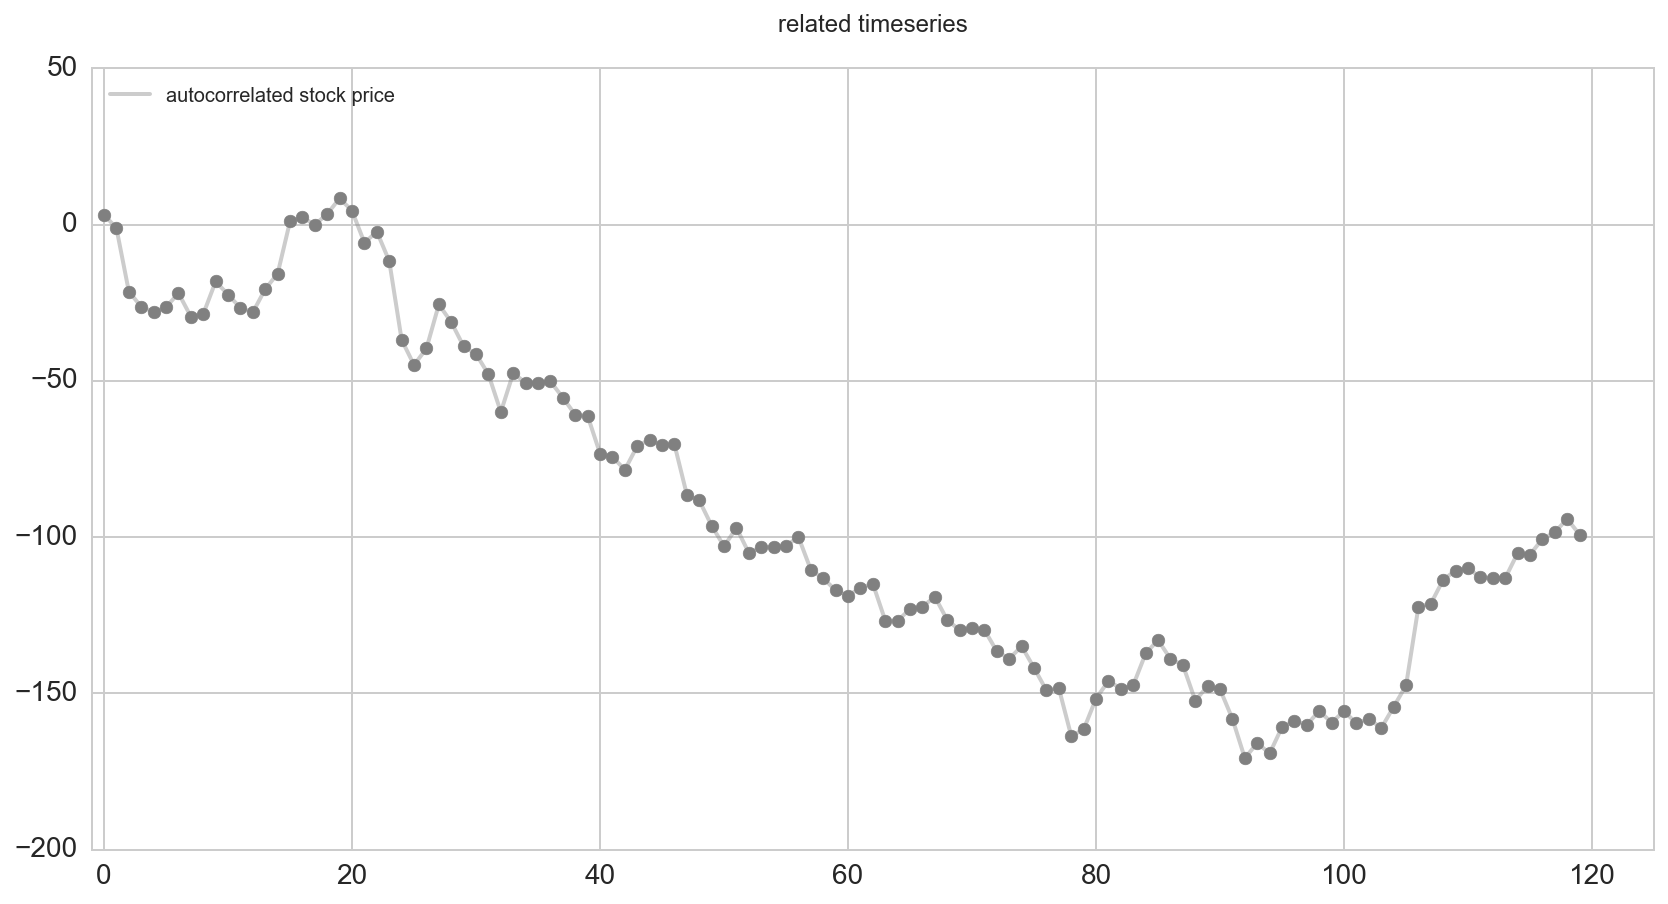

In [37]:
# plot the timeseries values:
plt.figure(figsize=(14,7))
plt.title('related timeseries\n')

plt.plot(x_times, ts_cor, lw=2, color='grey', alpha=0.4, label="autocorrelated stock price")
plt.scatter(x_times, ts_cor, s=40, color='grey')

plt.xlim([-1, 125])
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')

plt.show()

# Part 3: Make AR model component

In [81]:
from sklearn.linear_model import LinearRegression



def make_ar_coefs(dts, lag):
    
    # depending on our lag, will impact how much of current stock timeseries can be used
    current_dts = dts[lag:]
    
    # collect lagged timeseries:
    lagged_dts = []
    for current_lag in range(1, lag+1):
        current_lagged_dts = dts[lag-current_lag:-current_lag]
        lagged_dts.append(current_lagged_dts)
        
#     print 'original dts', dts
#     print 'current dts', current_dts
    
#     for i, ldts in enumerate(lagged_dts):
#         print 'lag', i+1, 'lagged dts', ldts
        
    Y = np.array(current_dts)
    X = np.array(lagged_dts).T
    
    ar_model = LinearRegression()
    ar_model.fit(X, Y)
    
    print ar_model.intercept_
    print ar_model.coef_
    
    return ar_model, X
    

In [82]:
ar_model = make_ar_coefs(dts_cor, 2)

-0.72764668688
[ 0.13859139 -0.0129895 ]


In [83]:
lagged_dts_cor = [dts_cor[1:-1], dts_cor[0:-2]]
lagged_dts_cor = np.array(lagged_dts_cor).T

ar_lag2_predictions = ar_model.predict(lagged_dts_cor)

print ar_lag2_predictions[0:5]

AttributeError: 'tuple' object has no attribute 'predict'

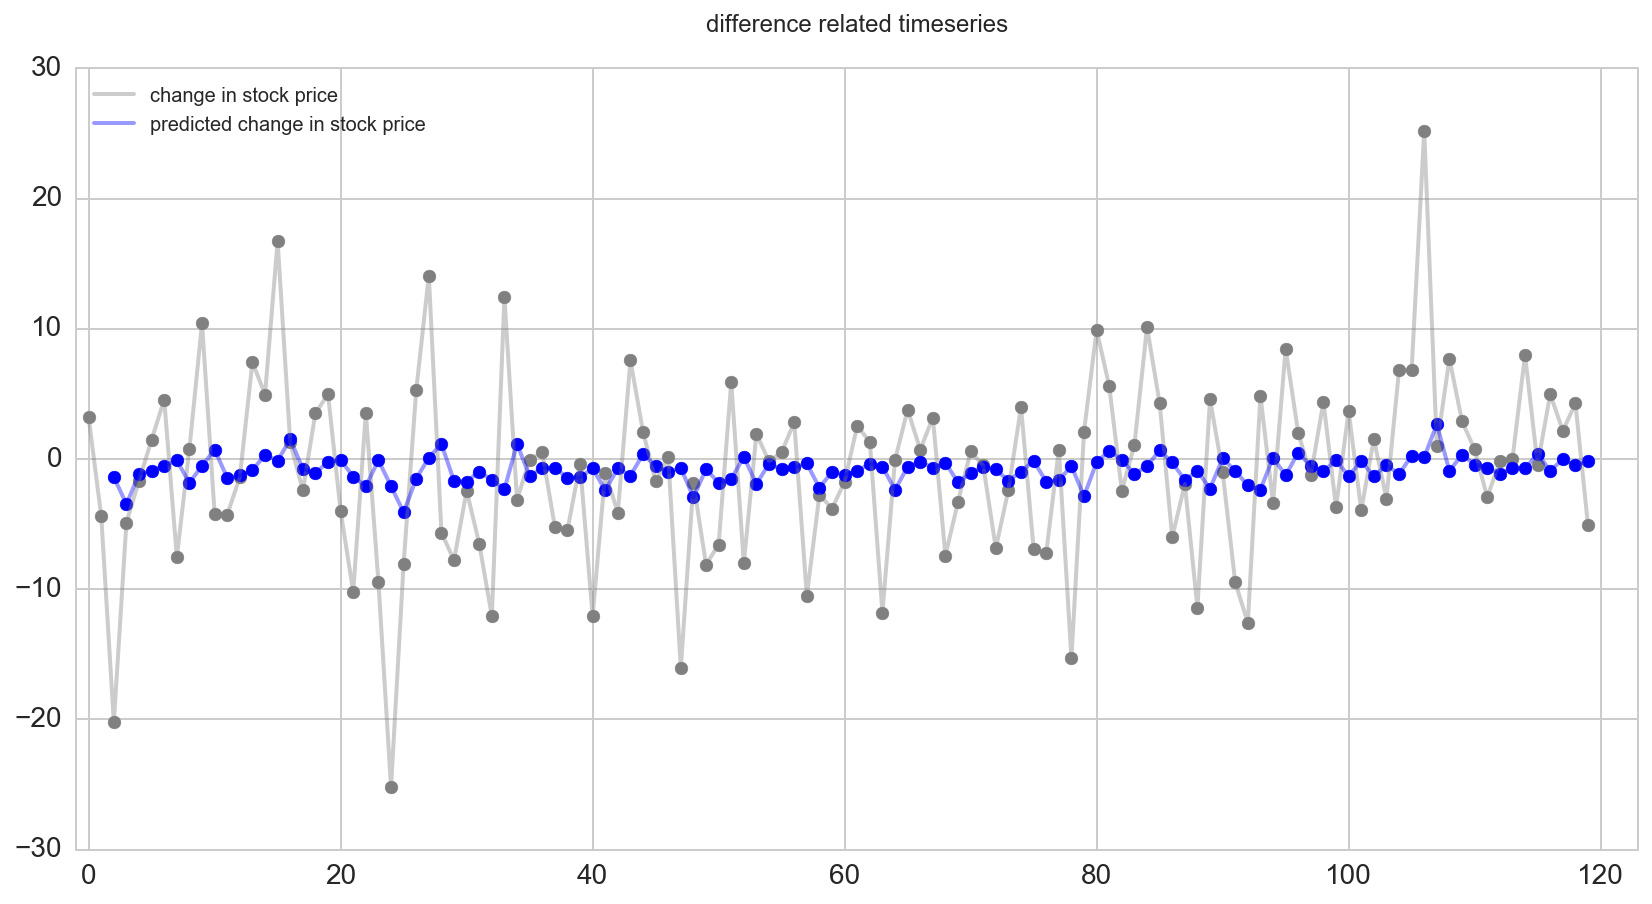

In [84]:
# plot the timeseries values:
plt.figure(figsize=(14,7))
plt.title('difference related timeseries\n')

plt.plot(x_times, dts_cor, lw=2, color='grey', alpha=0.4, label="change in stock price")
plt.scatter(x_times, dts_cor, s=40, color='grey')

plt.plot(x_times[2:], ar_lag2_predictions, lw=2, color='blue', alpha=0.4, label="predicted change in stock price")
plt.scatter(x_times[2:], ar_lag2_predictions, s=40, color='blue')

plt.xlim([-1, 123])
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')

plt.show()

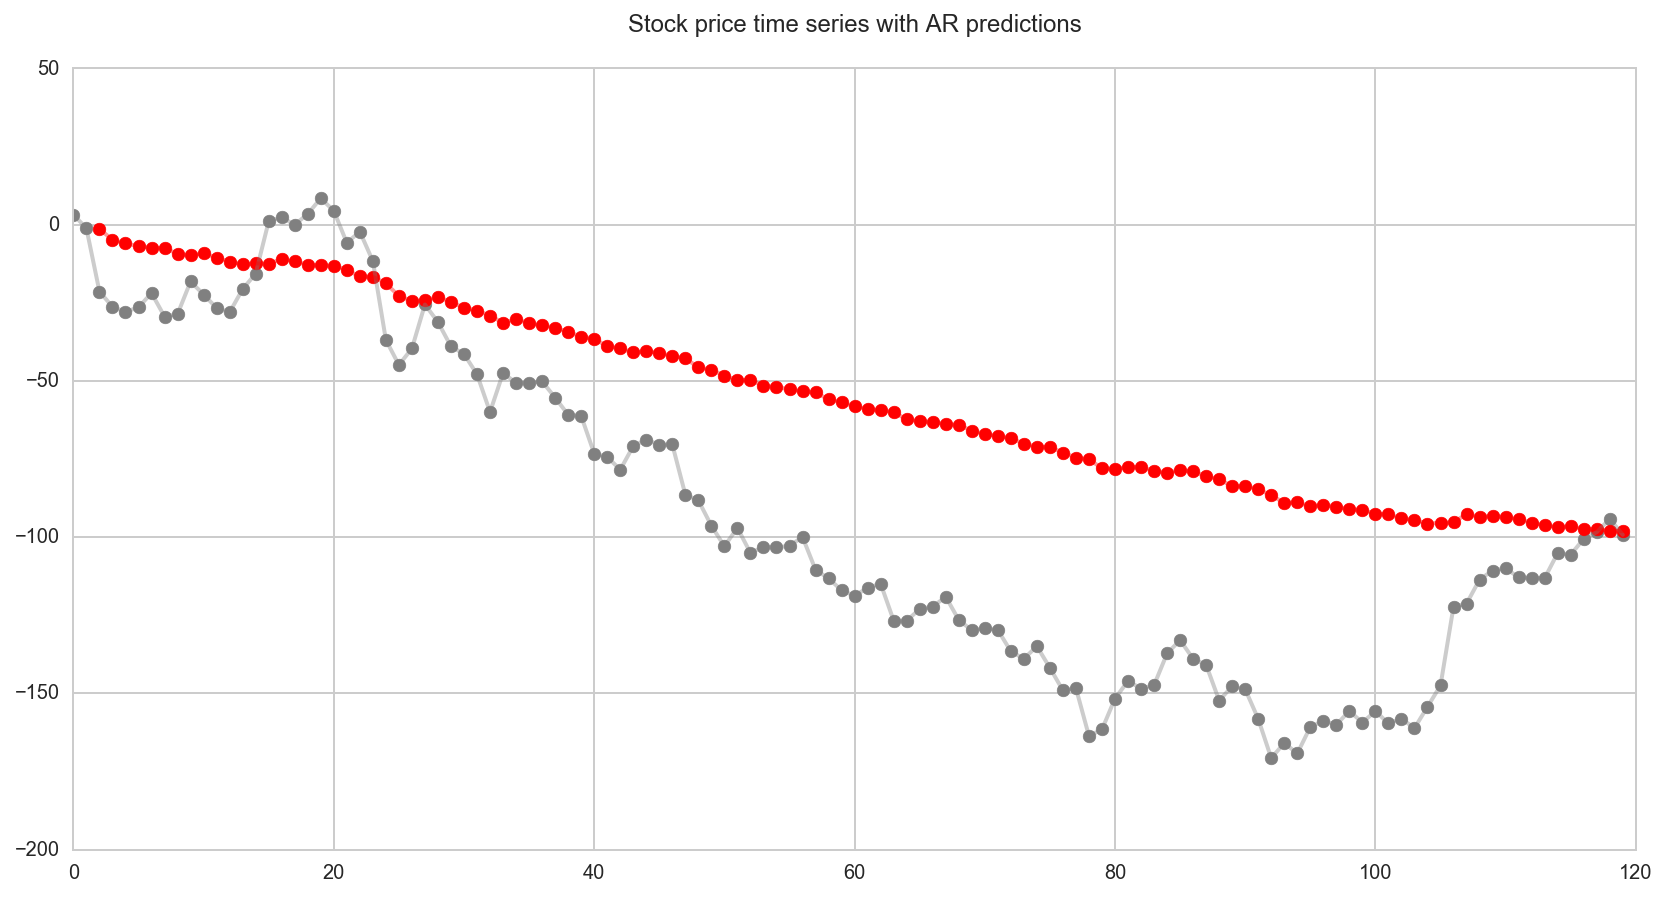

In [85]:
# Plot actual stock price with predictions

ar_lag2_ts = np.cumsum(ar_lag2_predictions)

plt.figure(figsize=(14,7))
plt.title('Stock price time series with AR predictions\n')

plt.plot(x_times, ts_cor, lw=2, color='grey', alpha=0.4, label = 'stock price')
plt.scatter(x_times, ts_cor, s=40, color='grey')

plt.plot(x_times[2:], ar_lag2_ts, lw=2, color='red', alpha=0.4, label = 'stock price')
plt.scatter(x_times[2:], ar_lag2_ts, s=40, color='red')

plt.xlim(0,120)
plt.show()

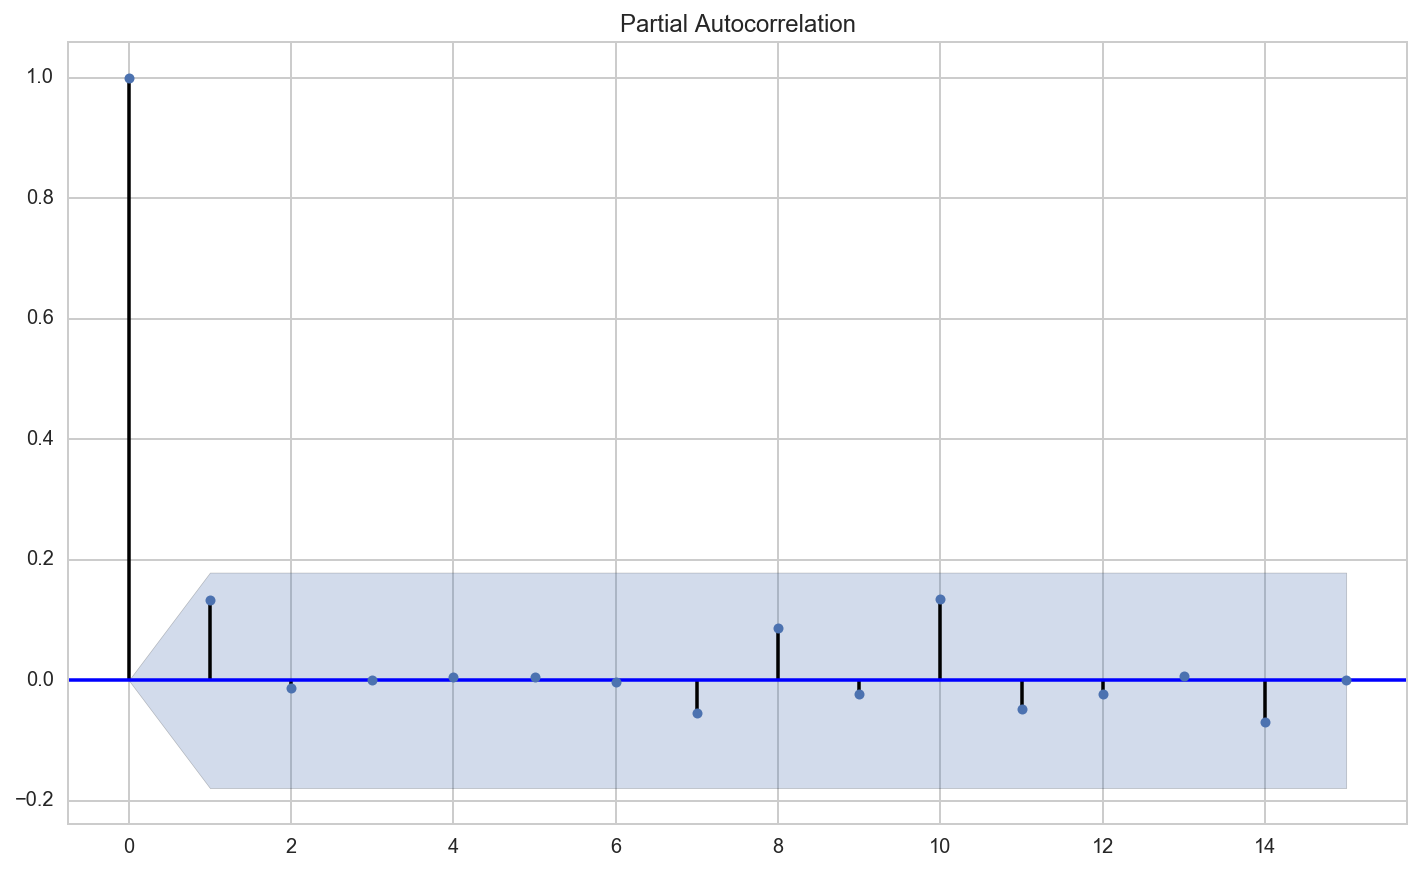

In [86]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(12,7))
ax = fig.gca()

plot_pacf(dts_cor, lags=15, ax=ax)
plt.show()

# Part 4: Constructing the Moving Average (MA) model

In [87]:
def make_rolling_mean(dts, window=5):
    
    rolling_means = []
    
    for ind in range(len(dts)):
        
        left_side = max(0, ind-window)
        right_side = ind
        tmp_window = dts[left_side:right_side]
    
        rolling_mean = np.mean(tmp_window)
        
        rolling_means.append(rolling_mean)
        
    return np.array(rolling_means)

In [88]:
tmp = range(1,11)

In [89]:
window = 5

In [90]:
for ind in range(1, len(tmp)+1):
    left_side = max(0, ind-window)
    right_side = ind
    tmp_window = tmp[left_side:right_side]
    
    rolling_mean = np.mean(tmp_window)
    
    print left_side, right_side, tmp_window, rolling_mean

0 1 [1] 1.0
0 2 [1, 2] 1.5
0 3 [1, 2, 3] 2.0
0 4 [1, 2, 3, 4] 2.5
0 5 [1, 2, 3, 4, 5] 3.0
1 6 [2, 3, 4, 5, 6] 4.0
2 7 [3, 4, 5, 6, 7] 5.0
3 8 [4, 5, 6, 7, 8] 6.0
4 9 [5, 6, 7, 8, 9] 7.0
5 10 [6, 7, 8, 9, 10] 8.0


In [91]:
dts_cor_rm = make_rolling_mean(dts_cor, window=5)

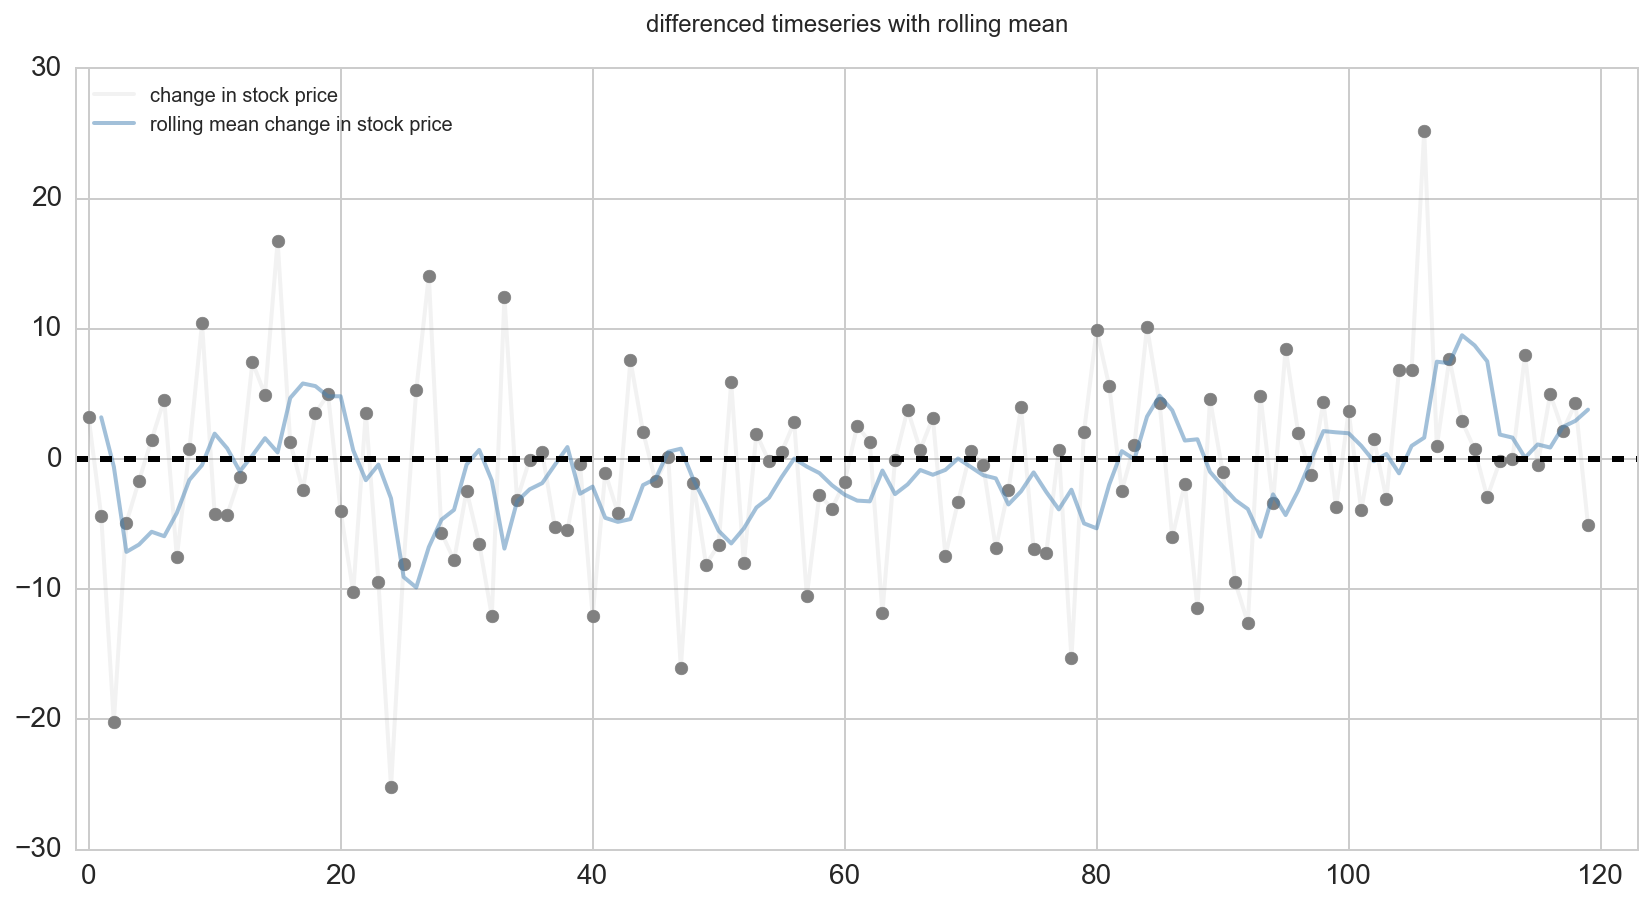

In [92]:
plt.figure(figsize=(14,7))
plt.title('differenced timeseries with rolling mean\n')

plt.plot(x_times, dts_cor, lw=2, color='grey', alpha=0.1, label="change in stock price")
plt.scatter(x_times, dts_cor, s=40, color='grey')

plt.plot(x_times, dts_cor_rm, lw=2, color='steelblue', alpha=0.5, 
         label="rolling mean change in stock price")
#plt.scatter(x_times, dts_cor_rm, s=40, color='steelblue')

# plot a horizontal line at zero:
plt.axhline(0, lw=3, ls='dashed', color='black')

plt.xlim([-1, 123])
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')

plt.show()

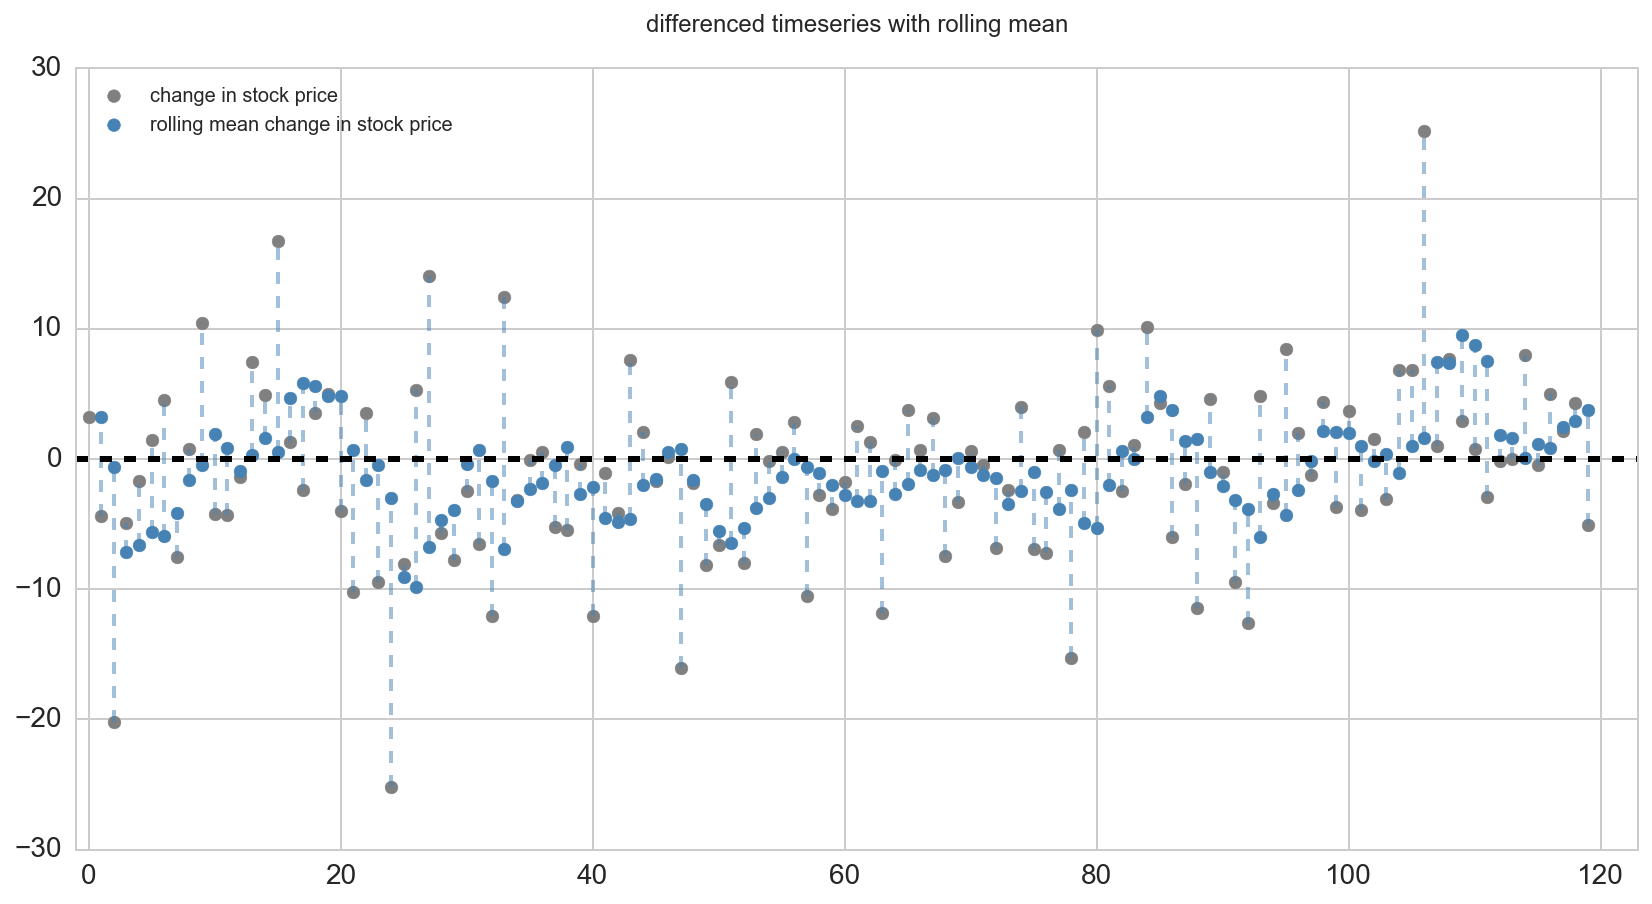

In [93]:
# Errors from mean to difference

from scipy.interpolate import interp1d

# plot the differenced timeseries values and predictions from AR model:
plt.figure(figsize=(14,7))
plt.title('differenced timeseries with rolling mean\n')

plt.scatter(x_times, dts_cor, s=40, color='grey',
            label="change in stock price")

plt.scatter(x_times, dts_cor_rm, s=40, color='steelblue',
           label="rolling mean change in stock price")

ylim = plt.gca().get_ylim()
interpolater = interp1d([ylim[0], ylim[1]], [0,1])

for x, dts_point, mean_point in zip(x_times, dts_cor, dts_cor_rm):
    errmin = interpolater(min(dts_point, mean_point))
    errmax = interpolater(max(dts_point, mean_point))
    
    plt.axvline(x=x, ymin=errmin, ymax=errmax,
                ls='dashed', lw=2, 
                color='steelblue', alpha=0.5)

# plot a horizontal line at zero:
plt.axhline(0, lw=3, ls='dashed', color='black')

plt.xlim([-1, 123])
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')

plt.show()

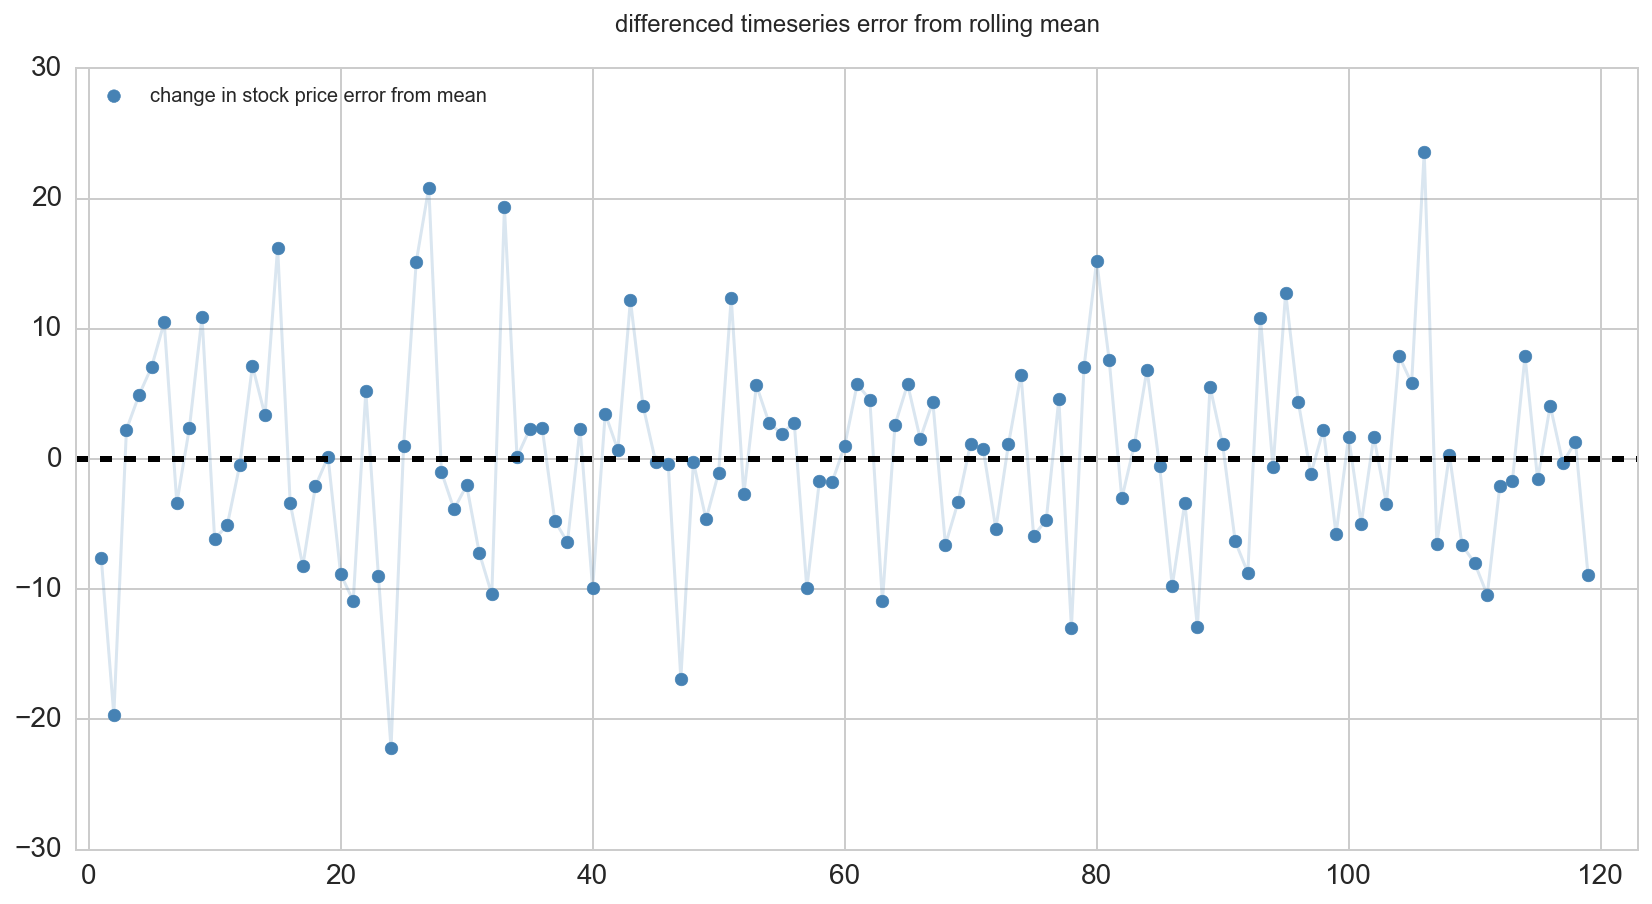

In [94]:
# plot the errors

dts_cor_frommean_err = dts_cor - dts_cor_rm

# plot the differenced timeseries values and predictions from AR model:
plt.figure(figsize=(14,7))
plt.title('differenced timeseries error from rolling mean\n')

plt.plot(x_times, dts_cor_frommean_err, lw=1.5, color='steelblue', alpha=0.2)

plt.scatter(x_times, dts_cor_frommean_err, s=40, color='steelblue',
           label="change in stock price error from mean")

# plot a horizontal line at zero:
plt.axhline(0, lw=3, ls='dashed', color='black')

plt.xlim([-1, 123])
plt.tick_params(labelsize=14)
plt.legend(loc='upper left')

plt.show()

# Part 5: 